In [1]:
# Import relevant stuff
import pandas as pd
import numpy as np
from ast import literal_eval
import matplotlib.pyplot as plt

In [2]:
# Goes from a list stored in a df to just the value inside.
def fix_list_format(df, col_title):
    fixed_row = []
    for index, row in df.iterrows():
        str1 = row[col_title]
        if len(str1) > 2:
            fixed_row.append(row[col_title][1:-1])
        else:
            fixed_row.append(np.nan)
    df[col_title] = fixed_row

In [3]:
# Load mp-stable matches (2.1k)
df0 = pd.read_excel("C:/Users/Droor/OneDrive - Harvard University/Desktop/Master Folder/College (2022-2026)/Hoffman summer/git-clone/superconductors-ml/datasets/only_stable_mp_matches.xlsx")
df0 = df0.drop('material_dict_queried', axis=1)
df0['material_dict'] = df0['material_dict'].apply(literal_eval) #convert to list type
fix_list_format(df0, 'unit_cell_volumes')
df0_normalized = pd.json_normalize(df0['material_dict'])
df0_exploded = pd.concat([df0, df0_normalized], axis=1)
df0_exploded.head()

,sc_id,supercon_formula,cleaned_formula,material_dict,highest_Tc,average_Tc,std_Tc,entry_count,matches_by_element,matches_by_dict,...,Dy,Er,Ho,Tm,Br,Nd,Hg,Cl,Tc,Mn
0,[18852],Ag1B2,Ag1B2,"{'Ag': 1.0, 'B': 2.0}",6.7,6.7,0.0,1,[],[],...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,[20016],Ag1Ba2Ca2Cu3O9-z,Ag1Ba2Ca2Cu3O9,"{'Ag': 1.0, 'Ba': 2.0, 'Ca': 2.0, 'Cu': 3.0, '...",110,110.0,0.0,1,[],[],...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,[20017],Ag1Ba2Ca3Cu4O11-z,Ag1Ba2Ca3Cu4O11,"{'Ag': 1.0, 'Ba': 2.0, 'Ca': 3.0, 'Cu': 4.0, '...",117,117.0,0.0,1,[],[],...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,[20018],Ag1Ba2Ca4Cu5O13-z,Ag1Ba2Ca4Cu5O13,"{'Ag': 1.0, 'Ba': 2.0, 'Ca': 4.0, 'Cu': 5.0, '...",105,105.0,0.0,1,[],[],...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,[20019],Ag1Ba2Ca5Cu6O15-z,Ag1Ba2Ca5Cu6O15,"{'Ag': 1.0, 'Ba': 2.0, 'Ca': 5.0, 'Cu': 6.0, '...",80,80.0,0.0,1,[],[],...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [79]:
# Load all non-doped unique materials (14k)
df2 = pd.read_json("C:/Users/Droor/OneDrive - Harvard University/Desktop/Master Folder/College (2022-2026)/Hoffman summer/git-clone/superconductors-ml/datasets/unique_materials_14k.json")

df2_normalized = pd.json_normalize(df2['material_dict'])
df2_exploded = pd.concat([df2, df2_normalized], axis=1)
df2_exploded.head()


,sc_id,supercon_formula,cleaned_formula,material_dict,highest_Tc,average_Tc,std_Tc,entry_count,Ag,Al,...,Sm,Dy,Ir,K,Rb,Cs,Tm,Br,Cl,Tc
0,[12787],Ag0.002Al0.998,Ag0.002Al0.998,"{'Ag': 0.002, 'Al': 0.998}",1.128,1.128,0.0,1,0.002,0.998,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,[12816],Ag0.005Zn0.995,Ag0.005Zn0.995,"{'Ag': 0.005, 'Zn': 0.995}",0.763,0.763,0.0,1,0.005,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,[25145],Bi3.99Ag0.01S3O4,Bi3.99Ag0.01S3O4,"{'Ag': 0.01, 'Bi': 3.99, 'O': 4.0, 'S': 3.0}",4.310,4.310,0.0,1,0.010,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,[23179],Sr1Pd1.98Ag0.02Ge2,Sr1Pd1.98Ag0.02Ge2,"{'Ag': 0.02, 'Ge': 2.0, 'Pd': 1.98, 'Sr': 1.0}",2.640,2.640,0.0,1,0.020,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,[25146],Bi3.97Ag0.03S3O4,Bi3.97Ag0.03S3O4,"{'Ag': 0.03, 'Bi': 3.9699999999999998, 'O': 4....",4.200,4.200,0.0,1,0.030,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [84]:
# Only return entries in df2_exploded where the average_Tc column is higher than 30K.
df2_exploded_v2 = df2_exploded[df2_exploded['average_Tc'] > 30]
# How many of these have non Nan values in both Cu and O columns?
df2_exploded_v21 = df2_exploded_v2[~df2_exploded_v2['Cu'].isna() & ~df2_exploded_v2['O'].isna()]
df2_exploded_v21.shape

(4444, 85)

In [5]:
# Load element-data
element_data = pd.read_csv("C:/Users/Droor/OneDrive - Harvard University/Desktop/Master Folder/College (2022-2026)/Hoffman summer/git-clone/superconductors-ml/datasets/element_data.csv")
element_data = element_data.drop("Unnamed: 0", axis=1)
numeric_columns = element_data.select_dtypes(include=np.number).columns
element_data = element_data[[element_data.columns[0]] + list(numeric_columns)]
element_data.head()

,Element,AtomicMass,AtomicNumber,FirstIonizationEnergy,AtomicRadius,BoilingPoint,BrinellHardness,CovalentRadius,Density,ElectricalConductivity,...,Resistivity,SoundSpeed,SpaceGroupNumber,SpecificHeat,ThermalConductivity,ThermalExpansion,Valence,VaporizationHeat,VolumeMagneticSusceptibility,SuperconductingPoint
0,H,1.007940,1,1311.3,53.0,-252.87,NaN,31,0.0899,NaN,...,NaN,1270.0,194.0,14300.0,0.1805,NaN,1,0.452,-2.230000e-09,NaN
1,He,4.002602,2,2361.3,31.0,-268.93,NaN,28,0.1785,NaN,...,NaN,970.0,225.0,5193.1,0.1513,NaN,0,0.083,-1.050000e-09,NaN
2,Li,6.941000,3,519.9,167.0,1342.00,NaN,128,535.0000,1.100000e+07,...,9.400000e-08,6000.0,229.0,3570.0,85.0000,0.000046,1,147.000,1.370000e-05,NaN
3,Be,9.012182,4,898.8,112.0,2470.00,600.0,96,1848.0000,2.500000e+07,...,4.000000e-08,13000.0,194.0,1820.0,190.0000,0.000011,2,297.000,-2.328000e-05,0.026
4,B,10.811000,5,800.2,87.0,4000.00,NaN,85,2460.0000,1.000000e-04,...,1.000000e+04,16200.0,166.0,1030.0,27.0000,0.000006,3,507.000,-2.140000e-05,NaN


#### **Hamidieh-style model using element data**

In [6]:
# Choose the dataframe to use for generating features.
df_used = df2_exploded
df_used.head()

,sc_id,supercon_formula,cleaned_formula,material_dict,highest_Tc,average_Tc,std_Tc,entry_count,Ag,Al,...,Sm,Dy,Ir,K,Rb,Cs,Tm,Br,Cl,Tc
0,[12787],Ag0.002Al0.998,Ag0.002Al0.998,"{'Ag': 0.002, 'Al': 0.998}",1.128,1.128,0.0,1,0.002,0.998,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,[12816],Ag0.005Zn0.995,Ag0.005Zn0.995,"{'Ag': 0.005, 'Zn': 0.995}",0.763,0.763,0.0,1,0.005,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,[25145],Bi3.99Ag0.01S3O4,Bi3.99Ag0.01S3O4,"{'Ag': 0.01, 'Bi': 3.99, 'O': 4.0, 'S': 3.0}",4.310,4.310,0.0,1,0.010,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,[23179],Sr1Pd1.98Ag0.02Ge2,Sr1Pd1.98Ag0.02Ge2,"{'Ag': 0.02, 'Ge': 2.0, 'Pd': 1.98, 'Sr': 1.0}",2.640,2.640,0.0,1,0.020,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,[25146],Bi3.97Ag0.03S3O4,Bi3.97Ag0.03S3O4,"{'Ag': 0.03, 'Bi': 3.9699999999999998, 'O': 4....",4.200,4.200,0.0,1,0.030,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
from numpy.ma.core import mean
from scipy.stats import gmean, entropy
from statsmodels.stats.weightstats import DescrStatsW

# We are going to create a 3D space (np array) with coordinates (feature, property, material_name)

data = np.empty((len(df_used), 30, 10), dtype=object)
data.fill(None)

# Get the total number of atoms in all materials
df_elements = df_used.iloc[:, 8:]
n_atoms = np.nansum(df_elements, axis=1)
df_elements_normed = df_elements.div(n_atoms, axis=0)


# Iterate over every *material*
for material_index in range(len(df_used)):
   
    p_array = np.array(df_elements_normed.iloc[material_index].dropna().values)
    # Iterate over every *property*
    for property_index, property_name in enumerate(element_data.columns[1:31]):

        # intermediate
        index_list = df_elements.iloc[material_index].dropna().index.tolist()
        
        t_list = element_data[element_data['Element'].isin(index_list)].set_index('Element').loc[index_list, property_name].tolist()
        w_list = t_list / np.sum(t_list)
        capital_list = p_array * w_list / np.sum(p_array * w_list)

        # Add into our *3D-magic-thing* this coordinate.
        data[material_index, property_index, 0] = np.mean(t_list)
        data[material_index, property_index, 1] = np.average(t_list, weights=p_array)
        data[material_index, property_index, 2] = gmean(t_list)
        data[material_index, property_index, 3] = gmean(t_list, weights=p_array)
        data[material_index, property_index, 4] = entropy(w_list)
        data[material_index, property_index, 5] = entropy(capital_list)
        data[material_index, property_index, 6] = np.ptp(t_list)
        data[material_index, property_index, 7] = np.ptp(np.multiply(t_list, p_array))
        data[material_index, property_index, 8] = np.std(t_list)
        data[material_index, property_index, 9] = DescrStatsW(t_list, weights=p_array).std


In [8]:
# This creates a dataframe 'updated_df' from the features we just calcualted.
# STEPS to go from 3d and collapse down to 2d to get all features of a property (10*30 = 300 features total)

# Step 1: Create column names for the features
column_names = ['mean', 'weighted_mean', 'geom_mean', 'weighted_geom_mean',
                'entropy', 'weighted_entropy', 'range', 'weighted_range', 'std', 'weighted_std']

# Step 2: Create an empty dictionary
new_columns = {}

# Step 3: Iterate over each material
for material_index, row in df_used.iterrows():

  # Step 4: Iterate over each property
  for property_index, property_name in enumerate(element_data.columns[1:31]):

    # Step 5: Iterate over each feature index
    for feature_index in range(10):

      # Step 6: Retrieve the feature value
      feature_value = data[material_index][property_index][feature_index]

      # Step 7: Assign the feature value to the dictionary with unique column name
      column_name = f'{property_name}_{column_names[feature_index]}'
      new_columns.setdefault(column_name, []).append(feature_value)

# Step 8: Create a DataFrame from the dictionary
new_columns_df = pd.DataFrame(new_columns)

# Step 9: Merge the new DataFrame with df_used
updated_df = pd.merge(df_used, new_columns_df, left_index=True, right_index=True)

In [9]:
# # Save your dataframe
# updated_df.to_json('df_nondoped_materials_wfeatures.json')
# updated_df.to_excel('df_nondoped_materials_wfeatures.xlsx')

Load .json with features already generated:

In [10]:
# Uncomment based on what you want to do.
updated_df = pd.read_json("C:/Users/Droor/OneDrive - Harvard University/Desktop/Master Folder/College (2022-2026)/Hoffman summer/git-clone/superconductors-ml/datasets/df_unique_materials_wfeatures_v2.json")

In [11]:
updated_df_no_cuprates = updated_df[updated_df['Cu'].isna() & updated_df['O'].isna()]

Get information and redress missing element-data issues.

Run Models ( 8: is including stoichiometric information, 85: is starting at AtomicMass_mean)

In [92]:
df_for_model = updated_df
df_for_model.head(10)

,sc_id,supercon_formula,cleaned_formula,material_dict,highest_Tc,average_Tc,std_Tc,entry_count,Ag,Al,...,SuperconductingPoint_mean,SuperconductingPoint_weighted_mean,SuperconductingPoint_geom_mean,SuperconductingPoint_weighted_geom_mean,SuperconductingPoint_entropy,SuperconductingPoint_weighted_entropy,SuperconductingPoint_range,SuperconductingPoint_weighted_range,SuperconductingPoint_std,SuperconductingPoint_weighted_std
0,[12787],Ag0.002Al0.998,Ag0.002Al0.998,"{'Ag': 0.002, 'Al': 0.998}",1.128,1.128,0.0,1,0.002,0.998,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,[12816],Ag0.005Zn0.995,Ag0.005Zn0.995,"{'Ag': 0.005, 'Zn': 0.995}",0.763,0.763,0.0,1,0.005,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,[25145],Bi3.99Ag0.01S3O4,Bi3.99Ag0.01S3O4,"{'Ag': 0.01, 'Bi': 3.99, 'O': 4.0, 'S': 3.0}",4.310,4.310,0.0,1,0.010,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,[23179],Sr1Pd1.98Ag0.02Ge2,Sr1Pd1.98Ag0.02Ge2,"{'Ag': 0.02, 'Ge': 2.0, 'Pd': 1.98, 'Sr': 1.0}",2.640,2.640,0.0,1,0.020,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,[25146],Bi3.97Ag0.03S3O4,Bi3.97Ag0.03S3O4,"{'Ag': 0.03, 'Bi': 3.9699999999999998, 'O': 4....",4.200,4.200,0.0,1,0.030,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,[14866],Ag0.03Tl0.97,Ag0.03Tl0.97,"{'Ag': 0.03, 'Tl': 0.97}",2.670,2.670,0.0,1,0.030,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,[12794],Ag0.035Cd0.01Sn0.955,Ag0.035Cd0.01Sn0.955,"{'Ag': 0.035, 'Cd': 0.01, 'Sn': 0.955000000000...",3.650,3.650,0.0,1,0.035,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,[13],Ba0.1La1.9Ag0.05Cu0.95O4-Y,Ba0.1La1.9Ag0.05Cu0.95O4,"{'Ag': 0.05, 'Ba': 0.1, 'Cu': 0.95000000000000...",27.000,27.000,0.0,1,0.050,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,[25147],Bi3.95Ag0.05S3O4,Bi3.95Ag0.05S3O4,"{'Ag': 0.05, 'Bi': 3.95, 'O': 4.0, 'S': 3.0}",3.520,3.520,0.0,1,0.050,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,[12802],Ag0.05Rh0.04Ti0.91,Ag0.05Rh0.04Ti0.91,"{'Ag': 0.05, 'Rh': 0.04, 'Ti': 0.91}",1.950,1.950,0.0,1,0.050,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [145]:
X0 = df_for_model.iloc[:, [1,2,3,4] + list(range(8, df_for_model.shape[1]))].values
X1 = df_for_model.iloc[:, [1,2,3,4] + list(range(85, df_for_model.shape[1]))].values

(14577, 377)


In [147]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import xgboost as xgb

def train_evaluate_regression_model(X, y, model, start_feature_index):

    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=13)
    
    # Take only the features, not the ID columns
    X_train_2 = X_train[:, start_feature_index:]
    X_test_2 = X_test[:, start_feature_index:]

    print(X_train_2.shape)
    print(X_test_2.shape)

    # Convert inf values to NaN - Having issues with this.
    #X_train_3 = np.where(np.isinf(X_train_2), np.nan, X_train_2)
    #X_test_3 = np.where(np.isinf(X_test_2), np.nan, X_test_2)

    # Train the model
    model.fit(X_train_2, y_train)

    # Make predictions on the test set
    y_pred = model.predict(X_test_2)

    # Evaluate the model
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    return mse, r2, y_test, y_pred, model, X_train, X_test

In [148]:
# Step 1: Select the features and target variable
y = df_for_model['average_Tc'].values

X0 = df_for_model.iloc[:, [1, 2, 3, 4] + list(range(8, df_for_model.shape[1]))].values
XGB_stoichio_mse, XGB_stoichio_r2, XGB_stoichio_y_test, XGB_stoichio_y_pred, XGB_stoichio_model, XGB_stoichio_X_train, XGB_stoichio_X_test = train_evaluate_regression_model(X0, y, xgb.XGBRegressor(), 4)

X1 = df_for_model.iloc[:, [1, 2, 3, 4] + list(range(85, df_for_model.shape[1]))].values
XGB_nostoichio_mse, XGB_nostoichio_r2, XGB_nostoichio_y_test, XGB_nostoichio_y_pred, XGB_nostoichio_model, XGB_nostoichio_X_train, XGB_nostoichio_X_test = train_evaluate_regression_model(X1, y, xgb.XGBRegressor(), 84)

# Get the column names of the selected features
feature_columns_stoichio = df_for_model.columns[8:]
feature_columns_nostoichio = df_for_model.columns[85:]

print("XGBoost Regression (with stoichio features):")
print("MSE:", XGB_stoichio_mse)
print("R2 Score:", XGB_stoichio_r2)

print("XGBoost Regression (without stoichio features):")
print("MSE:", XGB_nostoichio_mse)
print("R2 Score:", XGB_nostoichio_r2)


(10203, 377)
(4374, 377)
(10203, 220)
(4374, 220)
XGBoost Regression (with stoichio features):
MSE: 84.50626619857998
R2 Score: 0.9154346337378885
XGBoost Regression (without stoichio features):
MSE: 91.26855226561165
R2 Score: 0.9086676184175817


In [ ]:
X_train_2

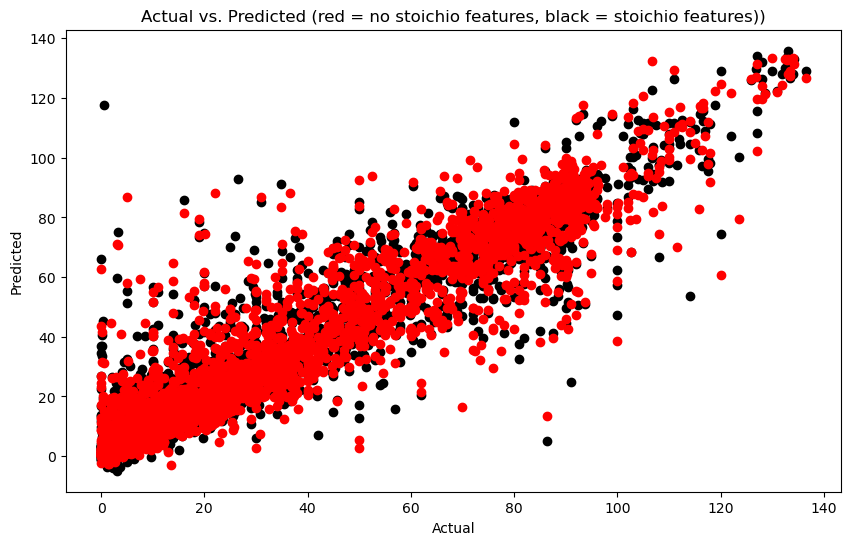

In [150]:
# Create a scatterplot of the actual versus predicted values
plt.figure(figsize=(10, 6))
plt.scatter(XGB_stoichio_y_test, XGB_stoichio_y_pred, color='k')
plt.scatter(XGB_nostoichio_y_test, XGB_nostoichio_y_pred, color='r')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs. Predicted (red = no stoichio features, black = stoichio features))')
plt.show()

In [151]:
# Calculate the absolute difference between actual and predicted Tc values
differences = np.abs(XGB_stoichio_y_test - XGB_stoichio_y_pred)

# Sort the differences in descending order and get the indices of the sorted array
sorted_indices = np.argsort(differences)[::-1]

# Get the top 15 materials with the highest differences
top_materials = [materials[i] for i in sorted_indices[:15]]

# Find the corresponding second value of XGB_stoichio_X_test for each top material
second_values = [XGB_stoichio_X_test[i, 1] for i in sorted_indices[:15]]

# Print the materials with their corresponding second values of XGB_stoichio_X_test
for material, value in zip(top_materials, second_values):
    print(f"Material: {material}, Second Value of XGB_stoichio_X_test: {value}")

NameError: name 'materials' is not defined

In [ ]:
# Give me code to list the 15 materials with the highest difference between actual and predicted Tc.

import numpy as np
import matplotlib.pyplot as plt

# Assuming you have the actual and predicted Tc values stored in separate arrays or lists
XGB_stoichio_y_test = [...]  # Replace [...] with your actual Tc values with stoichio features
XGB_stoichio_y_pred = [...]  # Replace [...] with your predicted Tc values with stoichio features
XGB_nostoichio_y_test = [...]  # Replace [...] with your actual Tc values without stoichio features
XGB_nostoichio_y_pred = [...]  # Replace [...] with your predicted Tc values without stoichio features
materials = [...]  # Replace [...] with your list of materials

# Calculate the absolute difference between actual and predicted Tc values
stoichio_differences = np.abs(np.array(XGB_stoichio_y_test) - np.array(XGB_stoichio_y_pred))
nostoichio_differences = np.abs(np.array(XGB_nostoichio_y_test) - np.array(XGB_nostoichio_y_pred))

# Sort the stoichio and nostoichio differences in descending order and get the indices of the sorted arrays
stoichio_sorted_indices = np.argsort(stoichio_differences)[::-1]
nostoichio_sorted_indices = np.argsort(nostoichio_differences)[::-1]

# Get the top 15 materials with the highest differences for stoichio and nostoichio
top_stoichio_materials = [materials[i] for i in stoichio_sorted_indices[:15]]
top_nostoichio_materials = [materials[i] for i in nostoichio_sorted_indices[:15]]

# Print the list of materials with their corresponding differences for stoichio
print("Top 15 materials with highest differences for stoichio features:")
for material, difference in zip(top_stoichio_materials, stoichio_differences[stoichio_sorted_indices][:15]):
    print(f"Material: {material}, Difference: {difference}")

# Print the list of materials with their corresponding differences for nostoichio
print("\nTop 15 materials with highest differences for no stoichio features:")
for material, difference in zip(top_nostoichio_materials, nostoichio_differences[nostoichio_sorted_indices][:15]):
    print(f"Material: {material}, Difference: {difference}")

# Create a scatterplot of the actual versus predicted values
plt.figure(figsize=(10, 6))
plt.scatter(XGB_stoichio_y_test, XGB_stoichio_y_pred, color='k')
plt.scatter(XGB_nostoichio_y_test, XGB_nostoichio_y_pred, color='r')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs. Predicted (red = no stoichio features, black = stoichio features))')
plt.show()


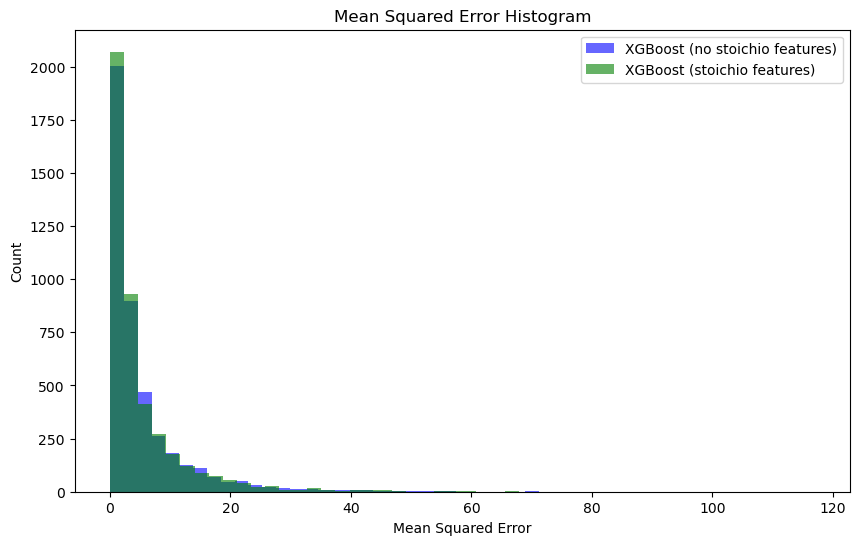

In [87]:
# Plot a histogram of the root mean squared error for each datapoint
plt.figure(figsize=(10, 6))
plt.hist(np.sqrt((XGB_nostoichio_y_test - XGB_nostoichio_y_pred)**2), bins=50, color='blue', alpha=0.6, label='XGBoost (no stoichio features)')
plt.hist(np.sqrt((XGB_stoichio_y_test - XGB_stoichio_y_pred)**2), bins=50, color='green', alpha=0.6, label='XGBoost (stoichio features)')
plt.legend(loc='upper right')
plt.xlabel('Mean Squared Error')
plt.ylabel('Count')
plt.title('Mean Squared Error Histogram')
plt.show()


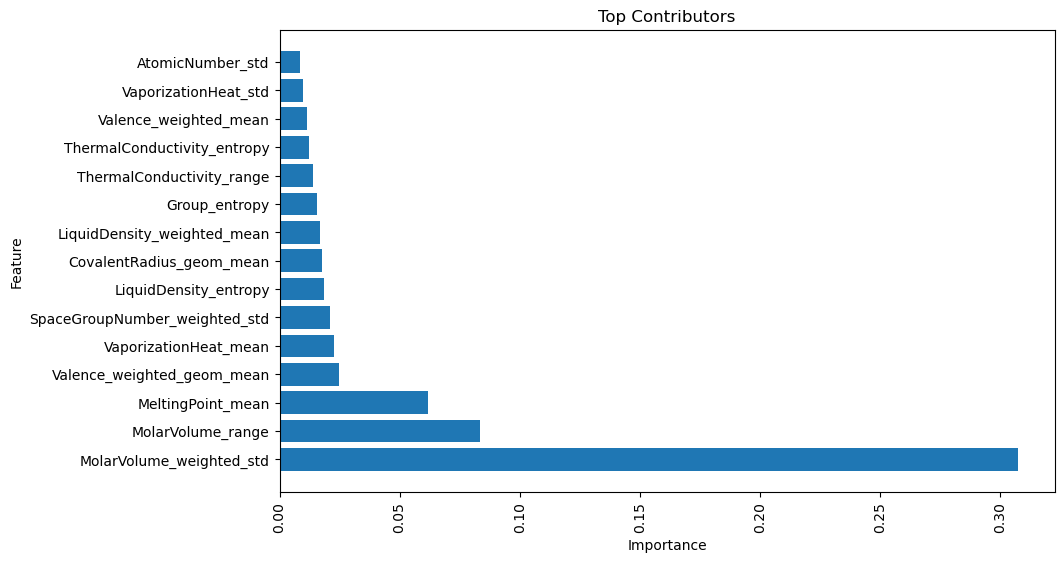

In [90]:
# Plot the feature importances of the model
# Get feature importances
importance = XGB_nostoichio_model.feature_importances_

# Create a DataFrame to store feature importances with column names
feature_importances = pd.DataFrame({'Feature': feature_columns_nostoichio, 'Importance': importance})

# Sort the DataFrame by importance in descending order
sorted_feature_importances = feature_importances.sort_values(by='Importance', ascending=False)

# Plot the top contributors
plt.figure(figsize=(10, 6))
plt.barh(sorted_feature_importances.head(15)['Feature'], sorted_feature_importances.head(15)['Importance'])
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Top Contributors')
plt.xticks(rotation=90)
plt.show()

In [ ]:
# Grid-search hyperparameter tuning:
import xgboost as xgb
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score

# Step 1: Select the features and target variable
X = updated_df.iloc[:, 8:].values
y = updated_df['average_Tc'].values

# Step 2: Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=33)

# Step 3: Define the parameter grid for tuning
param_grid = {
  'learning_rate': [0.1, 0.01, 0.001],
  'max_depth': [3, 5, 7],
  'n_estimators': [100, 500, 1000],
}

# Step 4: Create an XGBoost regression model
model = xgb.XGBRegressor()

# Step 5: Perform grid search to find the best hyperparameters
grid_search = GridSearchCV(model, param_grid, scoring='neg_mean_squared_error', cv=5)
grid_search.fit(X_train, y_train)

# Get the best model with the optimized hyperparameters
best_model = grid_search.best_estimator_

# Step 6: Make predictions on the testing data using the best model
y_pred = best_model.predict(X_test)

# Step 7: Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print('Root Mean Squared Error:', np.sqrt(mse))
print('R-squared Score:', r2)
print('Best Hyperparameters:', grid_search.best_params_)


KeyboardInterrupt: 

Neural network model without optimizing:

In [ ]:
# import numpy as np
# import tensorflow as tf
# from tensorflow import keras
# from sklearn.model_selection import train_test_split
# from sklearn.metrics import mean_squared_error, r2_score

# # Step 1: Select the features and target variable
# X = updated_df.iloc[:, 8:].values
# y = updated_df['average_Tc'].values


# # Step 2: Handle missing values
# X[np.isnan(X)] = 0  # Replace NaN values with 0
# X[np.isinf(X)] = 0  # Replace NaN values with 0
# X[np.isneginf(X)] = 0  # Replace NaN values with 0
# # Step 3: Split the data into training and testing sets
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=33)

# # Step 4: Create a neural network model
# model = keras.Sequential([
#     keras.layers.Dense(32, activation='relu', input_shape=(X_train.shape[1],)),
#     keras.layers.Dense(16, activation='relu'),
#     keras.layers.Dense(1)
# ])

# # Step 5: Compile the model
# model.compile(optimizer='adam', loss='mean_squared_error')

# # Step 6: Train the model on the training data
# model.fit(X_train, y_train, epochs=15, batch_size=32)

# # Step 7: Make predictions on the testing data
# y_pred = model.predict(X_test)

# # Step 8: Evaluate the model
# mse = mean_squared_error(y_test, y_pred)
# r2 = r2_score(y_test, y_pred)

# print('Root Mean Squared Error:', np.sqrt(mse))
# print('R-squared Score:', r2)


Epoch 1/15
5/5 [==============================] - 1s 2ms/step - loss: nan                        
Epoch 2/15
5/5 [==============================] - 0s 2ms/step - loss: nan
Epoch 3/15
5/5 [==============================] - 0s 3ms/step - loss: nan
Epoch 4/15
5/5 [==============================] - 0s 4ms/step - loss: nan
Epoch 5/15
5/5 [==============================] - 0s 5ms/step - loss: nan
Epoch 6/15
5/5 [==============================] - 0s 4ms/step - loss: nan
Epoch 7/15
5/5 [==============================] - 0s 3ms/step - loss: nan
Epoch 8/15
5/5 [==============================] - 0s 2ms/step - loss: nan
Epoch 9/15
5/5 [==============================] - 0s 3ms/step - loss: nan
Epoch 10/15
5/5 [==============================] - 0s 3ms/step - loss: nan
Epoch 11/15
5/5 [==============================] - 0s 2ms/step - loss: nan
Epoch 12/15
5/5 [==============================] - 0s 2ms/step - loss: nan
Epoch 13/15
5/5 [==============================] - 0s 2ms/step - loss: nan
Epoch 14/1

ValueError: Input contains NaN.

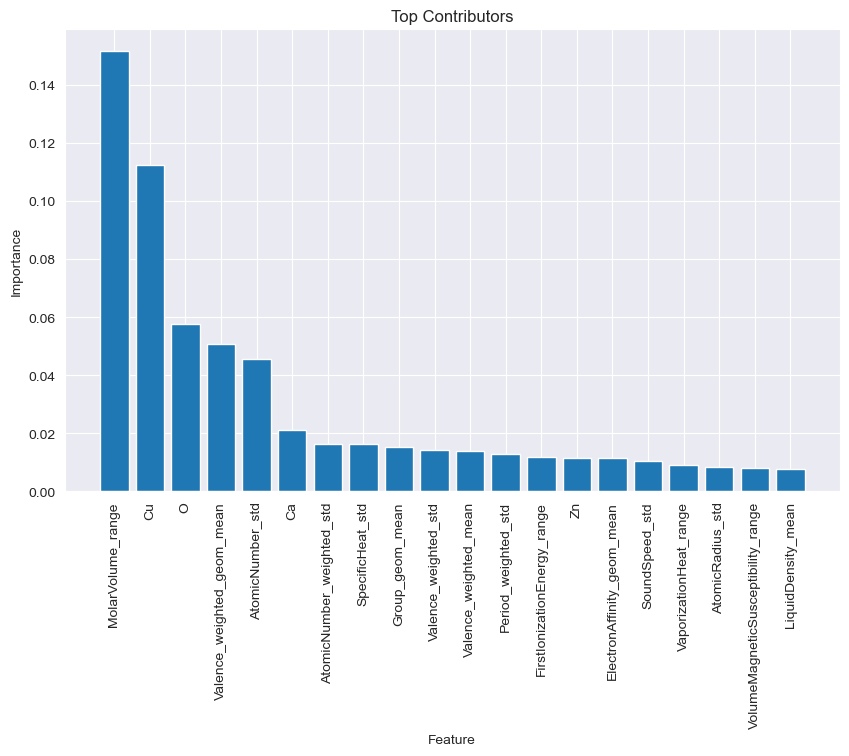

In [ ]:
# Plot the feature importances of the model
# Get feature importances
importance = model.feature_importances_

# Create a DataFrame to store feature importances with column names
feature_importances = pd.DataFrame({'Feature': feature_columns, 'Importance': importance})

# Sort the DataFrame by importance in descending order
sorted_feature_importances = feature_importances.sort_values(by='Importance', ascending=False)

# Plot the top contributors
plt.figure(figsize=(10, 6))
plt.bar(sorted_feature_importances.head(20)['Feature'], sorted_feature_importances.head(20)['Importance'])
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.title('Top Contributors')
plt.xticks(rotation=90)
plt.show()

In [ ]:
# Terrible way of being able to see the formula a guess and the real Tc
# X = updated_df.iloc[14100:14150,8:].values
# y = updated_df.iloc[14100:14150]['average_Tc'].values
# names = updated_df.iloc[14100:14150]['supercon_formula'].values
#
# predictions = model.predict(X)
# #
#
# for i, prediction in enumerate(predictions):
#    print(f"Formula: {names[i]}, Predicted Tc: {prediction}, Real Tc: {y[i]}")

In [ ]:
# # 30m runtime !!! This was an old way with more loops to make features like below.

# from numpy.ma.core import mean
# from scipy.stats import gmean, entropy
# from statsmodels.stats.weightstats import DescrStatsW

# # We are going to create a 3D space (np array) with coordinates (feature, property, material_name)

# data = np.empty((len(df_used),30,10), dtype=object)
# data.fill(None)

# # Iterate over every *material*
# for material_index, row in df_used.iterrows():


#   # NEXT TWO LINES CONTAIN MAGIC NUMBERS
#   # Get the total number of atoms in a material.
#   n_atoms = np.nansum(row[8:])

#   # get a series object of all the elements and how there are in the mat.
#   elem_row = row[8:]

#   # Create a Boolean mask for non-null entries
#   mask = elem_row.notna()

#   # Get intermediate variables to calculate features ---
#   atom_name_list = []
#   p_list = []

#   for index1, value1 in elem_row[mask].iteritems():
#     atom_name_list.append(index1)
#     p_list.append(value1 / n_atoms)


#   # Iterate over every *property*
#   for property_index, property_name in enumerate(element_data.columns[1:31]):

#     t_list = []

#     # Go through the atoms
#     for index2, value2 in elem_row[mask].items():

#       # Extract the value of the property
#       property_value = element_data[element_data['Element'] == index2][property_name].values[0]
#       #print(property_value)

#       # Append the property value to t_list
#       t_list.append(property_value)

#     p_list = np.array(p_list)
#     t_list = np.array(t_list)
#     print(t_list)
#     w_list = t_list / np.sum(t_list) # Could be wrong
#     capital_list = np.multiply(p_list, w_list) / np.sum(np.multiply(p_list, w_list))


#     # Add into our *3D-magic-thing* this coordinate.
#     data[material_index][property_index][0] = np.mean(t_list)
#     data[material_index][property_index][1] = DescrStatsW(t_list, weights=p_list).mean
#     data[material_index][property_index][2] = gmean(t_list)
#     data[material_index][property_index][3] = gmean(t_list, weights=p_list)
#     data[material_index][property_index][4] = entropy(w_list)
#     data[material_index][property_index][5] = entropy(capital_list)
#     data[material_index][property_index][6] = np.ptp(t_list)
#     data[material_index][property_index][7] = np.ptp(np.multiply(t_list, p_list))
#     data[material_index][property_index][8] = np.std(t_list)
#     data[material_index][property_index][9] = DescrStatsW(t_list, weights=p_list).std